In [1]:
import numpy as np
import cv2
from io import StringIO
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mylibrary as mylib
from mylibrary import euclidean_distance

%matplotlib inline

In [2]:
data_given = np.array([[5.9,3.2],
                 [4.6,2.9],
                 [6.2,2.8],
                 [4.7,3.2],
                 [5.5,4.2],
                 [5.0,3.0],
                 [4.9,3.1],
                 [6.7,3.1],
                 [5.1,3.8],
                 [6.0,3.0]])

In [3]:
data_given[(0,1),(1,1)]

array([3.2, 2.9])

In [4]:
class Center:
    def __init__(self, center, pts):
        self.center = center
        self.pts = pts
        
    def set_center(self, center):
        self.center = center
        
    def set_pts(self, pts):
        self.pts = pts
    
    def __eq__(self, other): 
        return np.all(self.center == other.center)
    
    def __repr__(self):
         return "cluster: " + str(self.center) 

In [5]:
def assign_to_center(data, centers, k):
    dis_matrix = np.empty((0,data.shape[0]))
    for center in centers:
        dis_matrix = np.vstack((dis_matrix, np.sum(np.square(data - center.center), axis=1)))
    belongs = np.argmin(dis_matrix, axis=0)
    for i in range(k):
        centers[i].pts = np.where(belongs == i)[0]
    return centers

In [6]:
def init_centers_random(data, k, seed=20):
    centers = data[np.random.RandomState(seed=seed).permutation(data.shape[0])[0:k]]
    centers = list(map(lambda x: Center(x,np.array([])), centers))
    centers = assign_to_center(data, centers,k)
    return centers

In [7]:
def init_given(data,k,seed):
    centers = np.array([[6.2,3.2],
              [6.6,3.7],
              [6.5,3.0]])
    centers = list(map(lambda x: Center(x,np.array([])), centers))
    centers = assign_to_center(data, centers,k)
    return centers

In [8]:
def update_centers(data, centers, k):
    not_updated = True
    new_centers = []
    for center in centers:
        new_centers.append(Center(np.mean(data[center.pts],axis=0), np.array([])))
    return assign_to_center(data,new_centers, k)   

In [9]:
def k_mean(data, k, init_fun, max_itr=500, seed=20, need_plot=False):
    itr = 0
    centers = init_fun(data,k,seed)
    while itr <= max_itr:
        itr += 1
        if need_plot:
            plot_k_min(data, centers, itr)
        if itr % 5 == 0:
            print("iteration :", itr)
        new_centers = update_centers(data,centers,k)
        centers_1 = np.asarray(list(map(lambda x: x.center ,centers)))
        centers_2 = np.asarray(list(map(lambda x: x.center ,new_centers)))
        if np.all(centers_1 == centers_2):
            break
        centers = new_centers 
    print("total iteration", itr)
    return centers

In [10]:
def plot_k_min(data, centers, itr):
    label_set = set(np.arange(len(centers)))
    color_map = dict(zip(label_set, cm.rainbow(np.linspace(0, 1, len(label_set)))))
    for label in label_set:
        index = centers[label].pts
        plt.scatter(data[index][:,0], data[index][:,1], s=20, c=color_map[label],
                    alpha=0.3, label=label)
        plt.scatter(centers[label].center[0], centers[label].center[1], s=100, c=color_map[label],
                    alpha=1.0, marker='x')
    plt.title("iteration: "+ str(itr))
    plt.legend(loc='best')
    plt.show()
    plt.close()

In [11]:
def plot_k_min(data, centers, itr):
    label_set = set(np.arange(len(centers)))
    #color_map = dict(zip(label_set, cm.rainbow(np.linspace(0, 1, len(label_set)))))
    color_map = dict(zip(label_set, ['red','green','blue']))
    for label in label_set:
        index = centers[label].pts
        plt.scatter(data[index][:,0], data[index][:,1], s=50, c=color_map[label],
                    alpha=0.3, label=label,marker='^')
        plt.scatter(centers[label].center[0], centers[label].center[1], s=50, color=color_map[label],
                    alpha=1.0, marker='o')
    plt.title("iteration: "+ str(itr))
    plt.legend(loc='best')
    plt.show()
    plt.close()

In [12]:
#data = mylib.generate_data()

total iteration 3


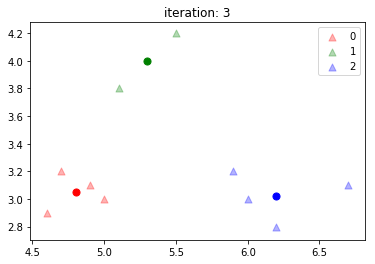

In [13]:
data = data_given
seed = 20
k = 3
max_itr = 100
itr = 0
centers = k_mean(data,k,init_fun=init_given ,need_plot=False)
plot_k_min(data,centers, 3)

### Color Quantization

In [14]:
def to_pixel_list(img):
    """
    Output:
        pixel_list: a list of pixel. value type float
    """
    pixel_list = np.empty((0,img[0].shape[1]))
    for row in img:
        pixel_list = np.append(pixel_list, row, axis=0)
    return pixel_list

In [15]:
def get_img(centers,shape):
    row_num, col_num, _ = img.shape
    new_img = np.empty((img.shape))
    for center in centers:
        pixel = center.center.astype(np.uint8)
        locs = list(map(lambda x: (int(x/col_num), int(x%col_num)) ,center.pts))
        for loc in locs:
            new_img[loc] = pixel
    return new_img.astype(np.uint8)

In [16]:
def quantized_img(img, k, init_fun = init_centers_random, max_itr=10000, seed=20):
    pixel_list = to_pixel_list(img)
    centers = k_mean(pixel_list, k, init_fun, max_itr=100000, seed=seed)
    return get_img(centers,img.shape)

### Test

In [17]:
img = cv2.imread("../data/baboon.jpg")

In [18]:
ks = [3,5,10,20]
for k in ks:
    print("k =",k)
    new_img = quantized_img(img,k)
    cv2.imwrite("../task3_img/task3_baboon_"+str(k)+".jpg",new_img)
    print()

k = 3
iteration : 5
iteration : 10
iteration : 15
iteration : 20
iteration : 25
iteration : 30
total iteration 31

k = 5
iteration : 5
iteration : 10
iteration : 15
iteration : 20
iteration : 25
iteration : 30
iteration : 35
total iteration 35

k = 10
iteration : 5
iteration : 10
iteration : 15
iteration : 20
iteration : 25
iteration : 30
iteration : 35
iteration : 40
iteration : 45
iteration : 50
iteration : 55
iteration : 60
iteration : 65
iteration : 70
iteration : 75
iteration : 80
iteration : 85
iteration : 90
iteration : 95
iteration : 100
iteration : 105
iteration : 110
iteration : 115
iteration : 120
iteration : 125
iteration : 130
iteration : 135
iteration : 140
iteration : 145
total iteration 145

k = 20
iteration : 5
iteration : 10
iteration : 15
iteration : 20
iteration : 25
iteration : 30
iteration : 35
iteration : 40
iteration : 45
iteration : 50
iteration : 55
iteration : 60
iteration : 65
iteration : 70
iteration : 75
iteration : 80
iteration : 85
iteration : 90
iterati

In [39]:
for col in zip(locs[:,0],locs[:,1]):
    print(col)

(0, 16)
(0, 29)
(0, 30)
(0, 33)
(0, 34)
(0, 38)
(0, 55)
(0, 61)
(0, 62)
(0, 68)
(0, 69)
(0, 80)
(0, 81)
(0, 90)
(0, 91)
(0, 105)
(0, 107)
(0, 108)
(0, 110)
(0, 113)
(0, 114)
(0, 115)
(0, 121)
(0, 122)
(0, 124)
(0, 125)
(0, 127)
(0, 128)
(0, 129)
(0, 131)
(0, 132)
(0, 134)
(0, 135)
(0, 136)
(0, 140)
(0, 142)
(0, 143)
(0, 144)
(0, 147)
(0, 148)
(0, 149)
(0, 164)
(0, 177)
(0, 179)
(0, 180)
(0, 181)
(0, 182)
(0, 187)
(0, 188)
(0, 192)
(0, 193)
(0, 194)
(0, 197)
(0, 198)
(0, 199)
(0, 200)
(0, 201)
(0, 202)
(0, 203)
(0, 204)
(0, 205)
(0, 206)
(0, 207)
(0, 208)
(0, 209)
(0, 212)
(0, 213)
(0, 219)
(0, 220)
(0, 221)
(0, 222)
(0, 223)
(0, 224)
(0, 225)
(0, 226)
(0, 232)
(0, 233)
(0, 234)
(0, 235)
(0, 236)
(0, 237)
(0, 238)
(0, 239)
(0, 243)
(0, 246)
(0, 249)
(0, 250)
(0, 251)
(0, 252)
(0, 256)
(0, 262)
(0, 263)
(0, 264)
(0, 267)
(0, 268)
(0, 269)
(0, 273)
(0, 274)
(0, 275)
(0, 276)
(0, 277)
(0, 284)
(0, 285)
(0, 286)
(0, 287)
(0, 288)
(0, 289)
(0, 290)
(0, 291)
(0, 292)
(0, 294)
(0, 296)
(0, 297

(9, 381)
(9, 382)
(9, 383)
(9, 387)
(9, 388)
(9, 389)
(9, 390)
(9, 391)
(9, 392)
(9, 393)
(9, 394)
(9, 399)
(9, 400)
(9, 401)
(9, 402)
(9, 405)
(9, 406)
(9, 407)
(9, 409)
(9, 410)
(9, 412)
(9, 413)
(9, 415)
(9, 416)
(9, 421)
(9, 422)
(9, 424)
(9, 425)
(9, 426)
(9, 432)
(9, 433)
(9, 434)
(9, 437)
(9, 438)
(9, 439)
(9, 445)
(9, 446)
(9, 447)
(9, 448)
(9, 450)
(9, 451)
(9, 452)
(9, 453)
(9, 456)
(9, 457)
(9, 458)
(9, 459)
(9, 460)
(9, 465)
(9, 466)
(9, 467)
(9, 468)
(9, 469)
(9, 470)
(9, 471)
(9, 472)
(9, 473)
(9, 474)
(9, 475)
(9, 476)
(9, 477)
(9, 478)
(9, 479)
(9, 485)
(9, 486)
(9, 487)
(9, 489)
(9, 490)
(9, 491)
(9, 492)
(9, 493)
(9, 494)
(9, 495)
(9, 496)
(9, 500)
(9, 501)
(9, 502)
(10, 24)
(10, 34)
(10, 46)
(10, 49)
(10, 50)
(10, 55)
(10, 57)
(10, 58)
(10, 59)
(10, 69)
(10, 70)
(10, 73)
(10, 76)
(10, 77)
(10, 78)
(10, 79)
(10, 80)
(10, 81)
(10, 82)
(10, 89)
(10, 96)
(10, 102)
(10, 112)
(10, 114)
(10, 115)
(10, 116)
(10, 117)
(10, 118)
(10, 121)
(10, 124)
(10, 125)
(10, 127)
(10, 128

(18, 92)
(18, 93)
(18, 94)
(18, 95)
(18, 96)
(18, 99)
(18, 105)
(18, 106)
(18, 107)
(18, 110)
(18, 111)
(18, 112)
(18, 113)
(18, 116)
(18, 117)
(18, 122)
(18, 123)
(18, 125)
(18, 126)
(18, 127)
(18, 128)
(18, 129)
(18, 130)
(18, 131)
(18, 132)
(18, 133)
(18, 134)
(18, 135)
(18, 136)
(18, 138)
(18, 139)
(18, 140)
(18, 143)
(18, 158)
(18, 159)
(18, 173)
(18, 180)
(18, 182)
(18, 199)
(18, 200)
(18, 202)
(18, 203)
(18, 204)
(18, 205)
(18, 206)
(18, 235)
(18, 236)
(18, 273)
(18, 274)
(18, 278)
(18, 279)
(18, 280)
(18, 281)
(18, 282)
(18, 283)
(18, 284)
(18, 285)
(18, 286)
(18, 287)
(18, 288)
(18, 289)
(18, 290)
(18, 291)
(18, 292)
(18, 297)
(18, 298)
(18, 299)
(18, 300)
(18, 301)
(18, 302)
(18, 304)
(18, 307)
(18, 308)
(18, 309)
(18, 311)
(18, 312)
(18, 313)
(18, 318)
(18, 319)
(18, 327)
(18, 330)
(18, 331)
(18, 332)
(18, 333)
(18, 334)
(18, 335)
(18, 336)
(18, 337)
(18, 338)
(18, 339)
(18, 340)
(18, 341)
(18, 343)
(18, 344)
(18, 345)
(18, 346)
(18, 347)
(18, 348)
(18, 349)
(18, 350)
(18, 3

(25, 127)
(25, 128)
(25, 129)
(25, 130)
(25, 138)
(25, 139)
(25, 140)
(25, 141)
(25, 142)
(25, 143)
(25, 145)
(25, 147)
(25, 148)
(25, 150)
(25, 151)
(25, 152)
(25, 155)
(25, 156)
(25, 157)
(25, 158)
(25, 161)
(25, 162)
(25, 167)
(25, 168)
(25, 169)
(25, 176)
(25, 177)
(25, 183)
(25, 184)
(25, 196)
(25, 197)
(25, 198)
(25, 199)
(25, 206)
(25, 211)
(25, 212)
(25, 213)
(25, 217)
(25, 220)
(25, 223)
(25, 224)
(25, 225)
(25, 226)
(25, 227)
(25, 228)
(25, 229)
(25, 230)
(25, 231)
(25, 232)
(25, 233)
(25, 237)
(25, 238)
(25, 239)
(25, 240)
(25, 250)
(25, 251)
(25, 253)
(25, 254)
(25, 255)
(25, 256)
(25, 258)
(25, 260)
(25, 261)
(25, 262)
(25, 263)
(25, 264)
(25, 265)
(25, 267)
(25, 268)
(25, 269)
(25, 270)
(25, 271)
(25, 272)
(25, 273)
(25, 275)
(25, 276)
(25, 277)
(25, 278)
(25, 279)
(25, 280)
(25, 281)
(25, 282)
(25, 283)
(25, 285)
(25, 286)
(25, 287)
(25, 288)
(25, 291)
(25, 292)
(25, 315)
(25, 316)
(25, 317)
(25, 318)
(25, 319)
(25, 320)
(25, 321)
(25, 324)
(25, 325)
(25, 329)
(25, 330)


(36, 47)
(36, 48)
(36, 49)
(36, 51)
(36, 52)
(36, 58)
(36, 59)
(36, 66)
(36, 67)
(36, 68)
(36, 69)
(36, 70)
(36, 73)
(36, 74)
(36, 93)
(36, 100)
(36, 101)
(36, 102)
(36, 103)
(36, 217)
(36, 218)
(36, 219)
(36, 220)
(36, 221)
(36, 225)
(36, 227)
(36, 228)
(36, 230)
(36, 231)
(36, 240)
(36, 241)
(36, 242)
(36, 247)
(36, 377)
(36, 386)
(36, 387)
(36, 409)
(36, 410)
(36, 411)
(36, 412)
(36, 423)
(36, 429)
(36, 432)
(36, 433)
(36, 435)
(36, 436)
(36, 437)
(36, 438)
(36, 439)
(36, 447)
(36, 448)
(36, 449)
(36, 450)
(36, 451)
(36, 452)
(36, 453)
(36, 454)
(36, 455)
(36, 456)
(36, 459)
(36, 460)
(36, 461)
(36, 472)
(36, 476)
(36, 477)
(36, 478)
(36, 479)
(36, 486)
(36, 491)
(36, 492)
(36, 493)
(36, 494)
(36, 495)
(36, 500)
(36, 501)
(36, 502)
(36, 503)
(36, 504)
(36, 505)
(36, 508)
(36, 509)
(37, 7)
(37, 18)
(37, 19)
(37, 29)
(37, 30)
(37, 31)
(37, 32)
(37, 34)
(37, 43)
(37, 50)
(37, 51)
(37, 52)
(37, 53)
(37, 54)
(37, 55)
(37, 56)
(37, 62)
(37, 64)
(37, 65)
(37, 66)
(37, 67)
(37, 68)
(37, 69)

(54, 74)
(54, 83)
(54, 84)
(54, 85)
(54, 99)
(54, 113)
(54, 114)
(54, 122)
(54, 153)
(54, 154)
(54, 195)
(54, 196)
(54, 204)
(54, 205)
(54, 207)
(54, 284)
(54, 286)
(54, 287)
(54, 288)
(54, 294)
(54, 312)
(54, 313)
(54, 331)
(54, 333)
(54, 334)
(54, 335)
(54, 356)
(54, 357)
(54, 358)
(54, 365)
(54, 366)
(54, 370)
(54, 376)
(54, 405)
(54, 412)
(54, 416)
(54, 417)
(54, 419)
(54, 420)
(54, 421)
(54, 422)
(54, 423)
(54, 424)
(54, 425)
(54, 426)
(54, 427)
(54, 432)
(54, 445)
(54, 454)
(54, 455)
(54, 456)
(54, 457)
(54, 458)
(54, 459)
(54, 460)
(54, 463)
(54, 464)
(54, 465)
(54, 466)
(54, 467)
(54, 468)
(54, 478)
(54, 479)
(54, 480)
(54, 488)
(54, 489)
(54, 490)
(54, 491)
(54, 492)
(54, 493)
(54, 495)
(54, 496)
(54, 500)
(54, 501)
(54, 505)
(54, 506)
(54, 507)
(54, 508)
(54, 509)
(54, 510)
(55, 0)
(55, 6)
(55, 18)
(55, 21)
(55, 22)
(55, 23)
(55, 24)
(55, 32)
(55, 33)
(55, 36)
(55, 37)
(55, 38)
(55, 39)
(55, 40)
(55, 41)
(55, 49)
(55, 55)
(55, 56)
(55, 57)
(55, 58)
(55, 64)
(55, 65)
(55, 67)


(66, 477)
(66, 478)
(66, 479)
(66, 480)
(66, 481)
(66, 482)
(66, 488)
(66, 489)
(66, 492)
(66, 493)
(66, 499)
(66, 500)
(66, 505)
(67, 20)
(67, 28)
(67, 29)
(67, 30)
(67, 39)
(67, 40)
(67, 41)
(67, 42)
(67, 50)
(67, 51)
(67, 52)
(67, 55)
(67, 56)
(67, 59)
(67, 60)
(67, 61)
(67, 62)
(67, 63)
(67, 64)
(67, 65)
(67, 66)
(67, 67)
(67, 68)
(67, 69)
(67, 70)
(67, 71)
(67, 72)
(67, 73)
(67, 74)
(67, 75)
(67, 76)
(67, 77)
(67, 78)
(67, 80)
(67, 81)
(67, 82)
(67, 83)
(67, 88)
(67, 89)
(67, 90)
(67, 91)
(67, 92)
(67, 100)
(67, 101)
(67, 103)
(67, 110)
(67, 113)
(67, 125)
(67, 126)
(67, 128)
(67, 129)
(67, 130)
(67, 131)
(67, 133)
(67, 137)
(67, 138)
(67, 139)
(67, 155)
(67, 193)
(67, 194)
(67, 214)
(67, 218)
(67, 222)
(67, 284)
(67, 285)
(67, 287)
(67, 294)
(67, 295)
(67, 318)
(67, 350)
(67, 351)
(67, 352)
(67, 366)
(67, 367)
(67, 368)
(67, 371)
(67, 372)
(67, 373)
(67, 374)
(67, 375)
(67, 376)
(67, 377)
(67, 378)
(67, 381)
(67, 383)
(67, 386)
(67, 397)
(67, 398)
(67, 399)
(67, 400)
(67, 401)
(6

(77, 224)
(77, 225)
(77, 278)
(77, 279)
(77, 286)
(77, 338)
(77, 339)
(77, 341)
(77, 349)
(77, 350)
(77, 351)
(77, 352)
(77, 358)
(77, 359)
(77, 362)
(77, 363)
(77, 366)
(77, 367)
(77, 368)
(77, 370)
(77, 371)
(77, 372)
(77, 373)
(77, 374)
(77, 375)
(77, 376)
(77, 380)
(77, 385)
(77, 395)
(77, 396)
(77, 397)
(77, 400)
(77, 406)
(77, 410)
(77, 411)
(77, 412)
(77, 414)
(77, 415)
(77, 416)
(77, 425)
(77, 426)
(77, 427)
(77, 428)
(77, 429)
(77, 431)
(77, 432)
(77, 433)
(77, 434)
(77, 435)
(77, 436)
(77, 437)
(77, 438)
(77, 446)
(77, 447)
(77, 449)
(77, 450)
(77, 451)
(77, 452)
(77, 453)
(77, 454)
(77, 455)
(77, 457)
(77, 458)
(77, 459)
(77, 460)
(77, 461)
(77, 462)
(77, 463)
(77, 464)
(77, 465)
(77, 466)
(77, 467)
(77, 468)
(77, 469)
(77, 470)
(77, 471)
(77, 472)
(77, 473)
(77, 474)
(77, 475)
(77, 480)
(77, 481)
(77, 482)
(77, 483)
(77, 484)
(77, 485)
(77, 486)
(77, 487)
(77, 502)
(77, 506)
(77, 507)
(77, 508)
(78, 10)
(78, 18)
(78, 22)
(78, 23)
(78, 24)
(78, 40)
(78, 41)
(78, 42)
(78, 43)

(85, 445)
(85, 446)
(85, 447)
(85, 458)
(85, 459)
(85, 463)
(85, 464)
(85, 468)
(85, 469)
(85, 470)
(85, 471)
(85, 472)
(85, 473)
(85, 474)
(85, 475)
(85, 476)
(85, 477)
(85, 478)
(85, 479)
(85, 480)
(85, 481)
(85, 485)
(85, 486)
(85, 500)
(85, 501)
(85, 502)
(85, 503)
(85, 505)
(85, 506)
(85, 507)
(85, 508)
(85, 509)
(85, 510)
(86, 14)
(86, 20)
(86, 21)
(86, 33)
(86, 34)
(86, 35)
(86, 36)
(86, 37)
(86, 45)
(86, 46)
(86, 47)
(86, 50)
(86, 51)
(86, 52)
(86, 53)
(86, 54)
(86, 77)
(86, 78)
(86, 80)
(86, 81)
(86, 82)
(86, 83)
(86, 100)
(86, 101)
(86, 102)
(86, 104)
(86, 105)
(86, 108)
(86, 109)
(86, 111)
(86, 113)
(86, 114)
(86, 115)
(86, 119)
(86, 120)
(86, 126)
(86, 127)
(86, 135)
(86, 138)
(86, 140)
(86, 141)
(86, 143)
(86, 151)
(86, 154)
(86, 155)
(86, 165)
(86, 166)
(86, 167)
(86, 168)
(86, 170)
(86, 171)
(86, 172)
(86, 174)
(86, 175)
(86, 179)
(86, 180)
(86, 181)
(86, 182)
(86, 183)
(86, 184)
(86, 185)
(86, 186)
(86, 187)
(86, 188)
(86, 193)
(86, 194)
(86, 198)
(86, 199)
(86, 200)
(8

(90, 470)
(90, 471)
(90, 472)
(90, 473)
(90, 474)
(90, 475)
(90, 476)
(90, 477)
(90, 478)
(90, 479)
(90, 480)
(90, 481)
(90, 482)
(90, 483)
(90, 484)
(90, 485)
(90, 486)
(90, 487)
(90, 488)
(90, 489)
(90, 490)
(90, 491)
(90, 492)
(90, 493)
(91, 5)
(91, 6)
(91, 7)
(91, 15)
(91, 16)
(91, 17)
(91, 18)
(91, 25)
(91, 36)
(91, 37)
(91, 38)
(91, 39)
(91, 40)
(91, 42)
(91, 52)
(91, 53)
(91, 54)
(91, 55)
(91, 56)
(91, 57)
(91, 58)
(91, 59)
(91, 60)
(91, 61)
(91, 62)
(91, 63)
(91, 64)
(91, 70)
(91, 77)
(91, 78)
(91, 79)
(91, 80)
(91, 81)
(91, 82)
(91, 83)
(91, 88)
(91, 93)
(91, 98)
(91, 99)
(91, 100)
(91, 101)
(91, 102)
(91, 106)
(91, 107)
(91, 108)
(91, 109)
(91, 110)
(91, 111)
(91, 113)
(91, 120)
(91, 121)
(91, 122)
(91, 123)
(91, 128)
(91, 130)
(91, 131)
(91, 135)
(91, 139)
(91, 148)
(91, 151)
(91, 161)
(91, 162)
(91, 168)
(91, 182)
(91, 185)
(91, 186)
(91, 188)
(91, 190)
(91, 193)
(91, 199)
(91, 200)
(91, 201)
(91, 203)
(91, 204)
(91, 230)
(91, 236)
(91, 237)
(91, 238)
(91, 273)
(91, 274)
(9

(101, 200)
(101, 201)
(101, 202)
(101, 203)
(101, 212)
(101, 213)
(101, 214)
(101, 230)
(101, 231)
(101, 232)
(101, 235)
(101, 253)
(101, 276)
(101, 277)
(101, 278)
(101, 279)
(101, 280)
(101, 282)
(101, 300)
(101, 301)
(101, 302)
(101, 303)
(101, 304)
(101, 305)
(101, 306)
(101, 307)
(101, 308)
(101, 309)
(101, 310)
(101, 311)
(101, 312)
(101, 313)
(101, 314)
(101, 315)
(101, 316)
(101, 317)
(101, 318)
(101, 319)
(101, 320)
(101, 321)
(101, 322)
(101, 323)
(101, 324)
(101, 325)
(101, 326)
(101, 327)
(101, 328)
(101, 329)
(101, 330)
(101, 331)
(101, 353)
(101, 373)
(101, 374)
(101, 375)
(101, 380)
(101, 383)
(101, 386)
(101, 396)
(101, 397)
(101, 407)
(101, 408)
(101, 409)
(101, 410)
(101, 411)
(101, 412)
(101, 413)
(101, 414)
(101, 415)
(101, 416)
(101, 417)
(101, 418)
(101, 422)
(101, 424)
(101, 425)
(101, 427)
(101, 429)
(101, 430)
(101, 437)
(101, 438)
(101, 439)
(101, 440)
(101, 443)
(101, 450)
(101, 451)
(101, 452)
(101, 453)
(101, 454)
(101, 455)
(101, 457)
(101, 458)
(101, 459)

(110, 297)
(110, 298)
(110, 299)
(110, 300)
(110, 301)
(110, 302)
(110, 303)
(110, 304)
(110, 305)
(110, 306)
(110, 307)
(110, 308)
(110, 309)
(110, 310)
(110, 311)
(110, 312)
(110, 313)
(110, 314)
(110, 315)
(110, 316)
(110, 317)
(110, 318)
(110, 319)
(110, 320)
(110, 321)
(110, 322)
(110, 323)
(110, 324)
(110, 325)
(110, 326)
(110, 327)
(110, 328)
(110, 329)
(110, 330)
(110, 331)
(110, 332)
(110, 333)
(110, 335)
(110, 336)
(110, 337)
(110, 365)
(110, 367)
(110, 368)
(110, 369)
(110, 370)
(110, 380)
(110, 383)
(110, 384)
(110, 385)
(110, 387)
(110, 388)
(110, 403)
(110, 409)
(110, 410)
(110, 411)
(110, 412)
(110, 413)
(110, 414)
(110, 415)
(110, 422)
(110, 423)
(110, 426)
(110, 427)
(110, 429)
(110, 430)
(110, 431)
(110, 432)
(110, 433)
(110, 434)
(110, 435)
(110, 436)
(110, 437)
(110, 438)
(110, 439)
(110, 440)
(110, 441)
(110, 442)
(110, 443)
(110, 444)
(110, 445)
(110, 446)
(110, 447)
(110, 448)
(110, 450)
(110, 451)
(110, 453)
(110, 454)
(110, 455)
(110, 456)
(110, 457)
(110, 458)

(116, 428)
(116, 437)
(116, 438)
(116, 439)
(116, 440)
(116, 441)
(116, 442)
(116, 443)
(116, 444)
(116, 445)
(116, 447)
(116, 448)
(116, 449)
(116, 450)
(116, 451)
(116, 452)
(116, 453)
(116, 454)
(116, 455)
(116, 456)
(116, 457)
(116, 458)
(116, 461)
(116, 462)
(116, 463)
(116, 464)
(116, 465)
(116, 466)
(116, 467)
(116, 469)
(116, 470)
(116, 475)
(116, 477)
(116, 479)
(116, 480)
(116, 481)
(116, 482)
(116, 483)
(116, 484)
(116, 487)
(116, 488)
(116, 489)
(116, 490)
(116, 491)
(116, 492)
(116, 493)
(116, 494)
(116, 495)
(116, 496)
(116, 497)
(116, 498)
(116, 502)
(117, 11)
(117, 26)
(117, 30)
(117, 31)
(117, 32)
(117, 33)
(117, 34)
(117, 36)
(117, 37)
(117, 38)
(117, 39)
(117, 40)
(117, 41)
(117, 42)
(117, 43)
(117, 44)
(117, 45)
(117, 46)
(117, 55)
(117, 56)
(117, 66)
(117, 67)
(117, 68)
(117, 69)
(117, 70)
(117, 71)
(117, 72)
(117, 74)
(117, 75)
(117, 76)
(117, 77)
(117, 78)
(117, 79)
(117, 80)
(117, 81)
(117, 82)
(117, 83)
(117, 84)
(117, 85)
(117, 86)
(117, 87)
(117, 90)
(117, 91

(123, 39)
(123, 45)
(123, 46)
(123, 47)
(123, 82)
(123, 84)
(123, 85)
(123, 86)
(123, 87)
(123, 88)
(123, 95)
(123, 96)
(123, 97)
(123, 98)
(123, 99)
(123, 100)
(123, 107)
(123, 108)
(123, 111)
(123, 112)
(123, 113)
(123, 114)
(123, 148)
(123, 152)
(123, 155)
(123, 156)
(123, 157)
(123, 158)
(123, 159)
(123, 160)
(123, 161)
(123, 162)
(123, 163)
(123, 164)
(123, 165)
(123, 166)
(123, 167)
(123, 168)
(123, 169)
(123, 176)
(123, 177)
(123, 178)
(123, 179)
(123, 180)
(123, 181)
(123, 182)
(123, 183)
(123, 184)
(123, 185)
(123, 186)
(123, 187)
(123, 188)
(123, 189)
(123, 190)
(123, 191)
(123, 192)
(123, 193)
(123, 194)
(123, 195)
(123, 196)
(123, 197)
(123, 198)
(123, 199)
(123, 200)
(123, 201)
(123, 202)
(123, 203)
(123, 204)
(123, 205)
(123, 206)
(123, 207)
(123, 208)
(123, 209)
(123, 210)
(123, 211)
(123, 212)
(123, 213)
(123, 214)
(123, 226)
(123, 229)
(123, 230)
(123, 231)
(123, 232)
(123, 234)
(123, 278)
(123, 279)
(123, 291)
(123, 292)
(123, 293)
(123, 294)
(123, 295)
(123, 296)
(12

(129, 210)
(129, 211)
(129, 212)
(129, 214)
(129, 252)
(129, 253)
(129, 289)
(129, 290)
(129, 291)
(129, 292)
(129, 293)
(129, 294)
(129, 295)
(129, 296)
(129, 297)
(129, 298)
(129, 299)
(129, 300)
(129, 301)
(129, 302)
(129, 303)
(129, 304)
(129, 305)
(129, 306)
(129, 307)
(129, 308)
(129, 309)
(129, 310)
(129, 311)
(129, 312)
(129, 313)
(129, 314)
(129, 315)
(129, 316)
(129, 317)
(129, 318)
(129, 319)
(129, 320)
(129, 321)
(129, 322)
(129, 323)
(129, 324)
(129, 325)
(129, 326)
(129, 327)
(129, 328)
(129, 329)
(129, 330)
(129, 331)
(129, 332)
(129, 333)
(129, 334)
(129, 335)
(129, 336)
(129, 337)
(129, 338)
(129, 339)
(129, 340)
(129, 343)
(129, 344)
(129, 345)
(129, 346)
(129, 347)
(129, 348)
(129, 349)
(129, 350)
(129, 351)
(129, 352)
(129, 353)
(129, 354)
(129, 355)
(129, 356)
(129, 357)
(129, 358)
(129, 359)
(129, 360)
(129, 361)
(129, 362)
(129, 363)
(129, 364)
(129, 365)
(129, 366)
(129, 367)
(129, 372)
(129, 394)
(129, 395)
(129, 396)
(129, 404)
(129, 405)
(129, 406)
(129, 407)

(133, 313)
(133, 314)
(133, 315)
(133, 316)
(133, 317)
(133, 318)
(133, 319)
(133, 320)
(133, 321)
(133, 322)
(133, 323)
(133, 324)
(133, 325)
(133, 326)
(133, 327)
(133, 328)
(133, 329)
(133, 330)
(133, 331)
(133, 332)
(133, 333)
(133, 334)
(133, 335)
(133, 336)
(133, 337)
(133, 338)
(133, 339)
(133, 340)
(133, 341)
(133, 342)
(133, 343)
(133, 344)
(133, 345)
(133, 346)
(133, 347)
(133, 348)
(133, 349)
(133, 350)
(133, 351)
(133, 352)
(133, 353)
(133, 354)
(133, 355)
(133, 356)
(133, 357)
(133, 358)
(133, 359)
(133, 360)
(133, 361)
(133, 362)
(133, 363)
(133, 364)
(133, 365)
(133, 366)
(133, 367)
(133, 369)
(133, 370)
(133, 378)
(133, 379)
(133, 380)
(133, 397)
(133, 398)
(133, 409)
(133, 410)
(133, 411)
(133, 412)
(133, 413)
(133, 418)
(133, 427)
(133, 428)
(133, 429)
(133, 430)
(133, 431)
(133, 432)
(133, 433)
(133, 434)
(133, 435)
(133, 436)
(133, 437)
(133, 439)
(133, 440)
(133, 441)
(133, 442)
(133, 443)
(133, 444)
(133, 445)
(133, 448)
(133, 450)
(133, 452)
(133, 453)
(133, 454)

(139, 324)
(139, 325)
(139, 326)
(139, 327)
(139, 328)
(139, 329)
(139, 330)
(139, 331)
(139, 332)
(139, 333)
(139, 334)
(139, 335)
(139, 336)
(139, 337)
(139, 338)
(139, 339)
(139, 340)
(139, 341)
(139, 342)
(139, 343)
(139, 344)
(139, 345)
(139, 346)
(139, 347)
(139, 348)
(139, 349)
(139, 350)
(139, 351)
(139, 352)
(139, 353)
(139, 354)
(139, 355)
(139, 356)
(139, 357)
(139, 358)
(139, 359)
(139, 360)
(139, 361)
(139, 362)
(139, 383)
(139, 384)
(139, 385)
(139, 386)
(139, 387)
(139, 390)
(139, 391)
(139, 392)
(139, 393)
(139, 394)
(139, 395)
(139, 400)
(139, 401)
(139, 402)
(139, 405)
(139, 406)
(139, 407)
(139, 413)
(139, 414)
(139, 415)
(139, 416)
(139, 417)
(139, 422)
(139, 429)
(139, 430)
(139, 431)
(139, 432)
(139, 433)
(139, 434)
(139, 435)
(139, 436)
(139, 437)
(139, 438)
(139, 439)
(139, 440)
(139, 441)
(139, 442)
(139, 443)
(139, 444)
(139, 445)
(139, 446)
(139, 448)
(139, 449)
(139, 450)
(139, 453)
(139, 454)
(139, 455)
(139, 456)
(139, 457)
(139, 458)
(139, 459)
(139, 460)

(145, 140)
(145, 141)
(145, 142)
(145, 143)
(145, 144)
(145, 145)
(145, 146)
(145, 147)
(145, 148)
(145, 149)
(145, 150)
(145, 151)
(145, 152)
(145, 153)
(145, 154)
(145, 155)
(145, 156)
(145, 157)
(145, 158)
(145, 159)
(145, 160)
(145, 161)
(145, 163)
(145, 164)
(145, 165)
(145, 166)
(145, 167)
(145, 168)
(145, 169)
(145, 170)
(145, 171)
(145, 172)
(145, 173)
(145, 174)
(145, 175)
(145, 176)
(145, 177)
(145, 178)
(145, 179)
(145, 180)
(145, 181)
(145, 182)
(145, 183)
(145, 184)
(145, 185)
(145, 186)
(145, 187)
(145, 188)
(145, 189)
(145, 190)
(145, 191)
(145, 192)
(145, 193)
(145, 194)
(145, 195)
(145, 196)
(145, 197)
(145, 198)
(145, 199)
(145, 200)
(145, 201)
(145, 202)
(145, 203)
(145, 204)
(145, 205)
(145, 206)
(145, 207)
(145, 208)
(145, 209)
(145, 210)
(145, 211)
(145, 212)
(145, 252)
(145, 253)
(145, 289)
(145, 290)
(145, 291)
(145, 292)
(145, 293)
(145, 294)
(145, 295)
(145, 296)
(145, 297)
(145, 298)
(145, 299)
(145, 300)
(145, 301)
(145, 302)
(145, 303)
(145, 304)
(145, 305)

(152, 310)
(152, 311)
(152, 312)
(152, 313)
(152, 314)
(152, 315)
(152, 316)
(152, 317)
(152, 318)
(152, 319)
(152, 320)
(152, 321)
(152, 322)
(152, 323)
(152, 324)
(152, 325)
(152, 326)
(152, 327)
(152, 328)
(152, 329)
(152, 330)
(152, 331)
(152, 332)
(152, 333)
(152, 334)
(152, 335)
(152, 336)
(152, 337)
(152, 338)
(152, 339)
(152, 340)
(152, 341)
(152, 342)
(152, 343)
(152, 344)
(152, 345)
(152, 346)
(152, 347)
(152, 348)
(152, 349)
(152, 352)
(152, 353)
(152, 354)
(152, 355)
(152, 356)
(152, 357)
(152, 358)
(152, 359)
(152, 360)
(152, 361)
(152, 362)
(152, 363)
(152, 364)
(152, 365)
(152, 366)
(152, 367)
(152, 368)
(152, 369)
(152, 370)
(152, 371)
(152, 372)
(152, 373)
(152, 376)
(152, 377)
(152, 378)
(152, 383)
(152, 389)
(152, 390)
(152, 391)
(152, 392)
(152, 393)
(152, 394)
(152, 395)
(152, 396)
(152, 404)
(152, 405)
(152, 406)
(152, 407)
(152, 408)
(152, 409)
(152, 410)
(152, 411)
(152, 412)
(152, 413)
(152, 421)
(152, 422)
(152, 423)
(152, 424)
(152, 425)
(152, 426)
(152, 427)

(159, 302)
(159, 303)
(159, 304)
(159, 305)
(159, 306)
(159, 307)
(159, 308)
(159, 309)
(159, 310)
(159, 311)
(159, 312)
(159, 313)
(159, 314)
(159, 315)
(159, 316)
(159, 317)
(159, 318)
(159, 319)
(159, 320)
(159, 321)
(159, 322)
(159, 323)
(159, 324)
(159, 325)
(159, 326)
(159, 327)
(159, 328)
(159, 329)
(159, 330)
(159, 331)
(159, 332)
(159, 333)
(159, 334)
(159, 335)
(159, 336)
(159, 337)
(159, 338)
(159, 339)
(159, 340)
(159, 341)
(159, 342)
(159, 343)
(159, 344)
(159, 345)
(159, 346)
(159, 347)
(159, 348)
(159, 349)
(159, 350)
(159, 351)
(159, 352)
(159, 353)
(159, 354)
(159, 355)
(159, 356)
(159, 357)
(159, 358)
(159, 359)
(159, 360)
(159, 361)
(159, 362)
(159, 363)
(159, 364)
(159, 365)
(159, 366)
(159, 367)
(159, 368)
(159, 369)
(159, 370)
(159, 371)
(159, 372)
(159, 373)
(159, 374)
(159, 375)
(159, 377)
(159, 378)
(159, 382)
(159, 384)
(159, 385)
(159, 386)
(159, 387)
(159, 388)
(159, 389)
(159, 390)
(159, 391)
(159, 392)
(159, 393)
(159, 394)
(159, 395)
(159, 396)
(159, 397)

(166, 346)
(166, 347)
(166, 348)
(166, 349)
(166, 350)
(166, 351)
(166, 352)
(166, 353)
(166, 354)
(166, 355)
(166, 356)
(166, 357)
(166, 358)
(166, 359)
(166, 360)
(166, 361)
(166, 362)
(166, 363)
(166, 364)
(166, 365)
(166, 366)
(166, 367)
(166, 368)
(166, 369)
(166, 370)
(166, 371)
(166, 372)
(166, 377)
(166, 380)
(166, 385)
(166, 386)
(166, 387)
(166, 390)
(166, 391)
(166, 392)
(166, 395)
(166, 396)
(166, 397)
(166, 400)
(166, 401)
(166, 402)
(166, 406)
(166, 407)
(166, 408)
(166, 409)
(166, 410)
(166, 411)
(166, 412)
(166, 413)
(166, 414)
(166, 415)
(166, 416)
(166, 417)
(166, 418)
(166, 419)
(166, 420)
(166, 421)
(166, 425)
(166, 426)
(166, 427)
(166, 428)
(166, 429)
(166, 430)
(166, 431)
(166, 432)
(166, 433)
(166, 434)
(166, 435)
(166, 436)
(166, 439)
(166, 440)
(166, 441)
(166, 442)
(166, 443)
(166, 444)
(166, 445)
(166, 446)
(166, 447)
(166, 448)
(166, 449)
(166, 450)
(166, 451)
(166, 452)
(166, 453)
(166, 454)
(166, 455)
(166, 456)
(166, 457)
(166, 458)
(166, 461)
(166, 462)

(173, 336)
(173, 337)
(173, 338)
(173, 339)
(173, 340)
(173, 341)
(173, 342)
(173, 343)
(173, 344)
(173, 345)
(173, 346)
(173, 347)
(173, 348)
(173, 349)
(173, 350)
(173, 351)
(173, 352)
(173, 353)
(173, 354)
(173, 355)
(173, 356)
(173, 357)
(173, 358)
(173, 359)
(173, 360)
(173, 361)
(173, 362)
(173, 363)
(173, 364)
(173, 365)
(173, 366)
(173, 367)
(173, 368)
(173, 369)
(173, 370)
(173, 371)
(173, 372)
(173, 373)
(173, 374)
(173, 375)
(173, 376)
(173, 377)
(173, 378)
(173, 379)
(173, 385)
(173, 386)
(173, 390)
(173, 391)
(173, 392)
(173, 405)
(173, 406)
(173, 407)
(173, 408)
(173, 409)
(173, 410)
(173, 411)
(173, 412)
(173, 413)
(173, 414)
(173, 415)
(173, 417)
(173, 418)
(173, 419)
(173, 420)
(173, 421)
(173, 422)
(173, 423)
(173, 424)
(173, 428)
(173, 429)
(173, 430)
(173, 434)
(173, 435)
(173, 438)
(173, 439)
(173, 440)
(173, 441)
(173, 442)
(173, 443)
(173, 444)
(173, 445)
(173, 446)
(173, 447)
(173, 448)
(173, 449)
(173, 450)
(173, 451)
(173, 452)
(173, 453)
(173, 455)
(173, 456)

(180, 393)
(180, 397)
(180, 402)
(180, 403)
(180, 407)
(180, 408)
(180, 409)
(180, 410)
(180, 411)
(180, 412)
(180, 413)
(180, 414)
(180, 423)
(180, 426)
(180, 427)
(180, 428)
(180, 429)
(180, 431)
(180, 432)
(180, 433)
(180, 434)
(180, 435)
(180, 436)
(180, 437)
(180, 438)
(180, 439)
(180, 440)
(180, 441)
(180, 442)
(180, 446)
(180, 447)
(180, 448)
(180, 449)
(180, 450)
(180, 451)
(180, 453)
(180, 454)
(180, 455)
(180, 456)
(180, 470)
(180, 471)
(180, 475)
(180, 476)
(180, 477)
(180, 478)
(180, 479)
(180, 480)
(180, 481)
(180, 482)
(180, 483)
(180, 484)
(180, 485)
(180, 486)
(180, 487)
(180, 488)
(180, 491)
(180, 492)
(180, 493)
(180, 494)
(180, 495)
(180, 496)
(181, 36)
(181, 37)
(181, 38)
(181, 39)
(181, 40)
(181, 41)
(181, 46)
(181, 52)
(181, 61)
(181, 64)
(181, 67)
(181, 68)
(181, 69)
(181, 70)
(181, 71)
(181, 72)
(181, 73)
(181, 74)
(181, 75)
(181, 76)
(181, 86)
(181, 87)
(181, 88)
(181, 89)
(181, 90)
(181, 91)
(181, 95)
(181, 96)
(181, 97)
(181, 102)
(181, 117)
(181, 130)
(181, 

(187, 493)
(187, 494)
(187, 495)
(187, 496)
(187, 497)
(188, 32)
(188, 33)
(188, 40)
(188, 60)
(188, 67)
(188, 68)
(188, 69)
(188, 78)
(188, 85)
(188, 86)
(188, 87)
(188, 94)
(188, 95)
(188, 96)
(188, 97)
(188, 104)
(188, 105)
(188, 106)
(188, 107)
(188, 108)
(188, 111)
(188, 112)
(188, 116)
(188, 117)
(188, 118)
(188, 129)
(188, 130)
(188, 132)
(188, 133)
(188, 134)
(188, 135)
(188, 136)
(188, 137)
(188, 138)
(188, 139)
(188, 140)
(188, 141)
(188, 142)
(188, 143)
(188, 144)
(188, 145)
(188, 146)
(188, 147)
(188, 148)
(188, 149)
(188, 150)
(188, 151)
(188, 152)
(188, 153)
(188, 154)
(188, 155)
(188, 156)
(188, 157)
(188, 158)
(188, 159)
(188, 160)
(188, 161)
(188, 162)
(188, 163)
(188, 164)
(188, 165)
(188, 166)
(188, 167)
(188, 168)
(188, 169)
(188, 170)
(188, 171)
(188, 172)
(188, 173)
(188, 174)
(188, 175)
(188, 176)
(188, 177)
(188, 178)
(188, 179)
(188, 180)
(188, 181)
(188, 182)
(188, 183)
(188, 184)
(188, 185)
(188, 186)
(188, 187)
(188, 188)
(188, 189)
(188, 190)
(188, 191)
(18

(195, 173)
(195, 174)
(195, 175)
(195, 176)
(195, 177)
(195, 178)
(195, 179)
(195, 180)
(195, 181)
(195, 182)
(195, 183)
(195, 184)
(195, 185)
(195, 186)
(195, 187)
(195, 188)
(195, 189)
(195, 190)
(195, 191)
(195, 192)
(195, 193)
(195, 194)
(195, 195)
(195, 196)
(195, 197)
(195, 198)
(195, 199)
(195, 200)
(195, 201)
(195, 202)
(195, 203)
(195, 204)
(195, 205)
(195, 206)
(195, 207)
(195, 208)
(195, 209)
(195, 210)
(195, 211)
(195, 255)
(195, 288)
(195, 289)
(195, 290)
(195, 291)
(195, 292)
(195, 293)
(195, 294)
(195, 295)
(195, 296)
(195, 297)
(195, 298)
(195, 299)
(195, 300)
(195, 301)
(195, 302)
(195, 303)
(195, 304)
(195, 305)
(195, 306)
(195, 307)
(195, 308)
(195, 309)
(195, 310)
(195, 311)
(195, 312)
(195, 313)
(195, 314)
(195, 315)
(195, 316)
(195, 317)
(195, 318)
(195, 319)
(195, 320)
(195, 321)
(195, 322)
(195, 323)
(195, 324)
(195, 325)
(195, 326)
(195, 327)
(195, 328)
(195, 329)
(195, 330)
(195, 331)
(195, 332)
(195, 333)
(195, 334)
(195, 335)
(195, 336)
(195, 337)
(195, 338)

(202, 347)
(202, 348)
(202, 349)
(202, 350)
(202, 351)
(202, 352)
(202, 353)
(202, 354)
(202, 355)
(202, 356)
(202, 357)
(202, 358)
(202, 359)
(202, 360)
(202, 361)
(202, 362)
(202, 363)
(202, 364)
(202, 365)
(202, 366)
(202, 367)
(202, 368)
(202, 369)
(202, 370)
(202, 371)
(202, 372)
(202, 373)
(202, 374)
(202, 375)
(202, 376)
(202, 377)
(202, 378)
(202, 379)
(202, 380)
(202, 400)
(202, 403)
(202, 404)
(202, 405)
(202, 406)
(202, 407)
(202, 408)
(202, 409)
(202, 410)
(202, 411)
(202, 412)
(202, 413)
(202, 416)
(202, 419)
(202, 420)
(202, 421)
(202, 422)
(202, 423)
(202, 424)
(202, 425)
(202, 426)
(202, 427)
(202, 430)
(202, 431)
(202, 432)
(202, 433)
(202, 434)
(202, 435)
(202, 436)
(202, 437)
(202, 438)
(202, 439)
(202, 440)
(202, 441)
(202, 442)
(202, 443)
(202, 444)
(202, 445)
(202, 446)
(202, 447)
(202, 448)
(202, 449)
(202, 450)
(202, 451)
(202, 452)
(202, 453)
(202, 454)
(202, 455)
(202, 456)
(202, 458)
(202, 459)
(202, 460)
(202, 461)
(202, 467)
(202, 468)
(202, 469)
(202, 470)

(208, 301)
(208, 302)
(208, 303)
(208, 304)
(208, 305)
(208, 306)
(208, 307)
(208, 308)
(208, 309)
(208, 310)
(208, 311)
(208, 312)
(208, 313)
(208, 314)
(208, 315)
(208, 316)
(208, 317)
(208, 318)
(208, 319)
(208, 320)
(208, 321)
(208, 322)
(208, 323)
(208, 324)
(208, 325)
(208, 326)
(208, 327)
(208, 328)
(208, 329)
(208, 330)
(208, 331)
(208, 332)
(208, 333)
(208, 334)
(208, 335)
(208, 336)
(208, 337)
(208, 338)
(208, 339)
(208, 340)
(208, 341)
(208, 342)
(208, 343)
(208, 344)
(208, 345)
(208, 346)
(208, 347)
(208, 348)
(208, 349)
(208, 350)
(208, 351)
(208, 352)
(208, 353)
(208, 354)
(208, 355)
(208, 356)
(208, 357)
(208, 358)
(208, 359)
(208, 360)
(208, 361)
(208, 362)
(208, 363)
(208, 364)
(208, 365)
(208, 366)
(208, 367)
(208, 368)
(208, 369)
(208, 370)
(208, 371)
(208, 372)
(208, 373)
(208, 374)
(208, 375)
(208, 376)
(208, 377)
(208, 378)
(208, 379)
(208, 380)
(208, 407)
(208, 408)
(208, 409)
(208, 410)
(208, 418)
(208, 419)
(208, 429)
(208, 430)
(208, 431)
(208, 438)
(208, 439)

(214, 180)
(214, 181)
(214, 182)
(214, 183)
(214, 184)
(214, 185)
(214, 186)
(214, 187)
(214, 188)
(214, 189)
(214, 190)
(214, 191)
(214, 192)
(214, 193)
(214, 194)
(214, 195)
(214, 196)
(214, 197)
(214, 198)
(214, 199)
(214, 200)
(214, 201)
(214, 202)
(214, 203)
(214, 204)
(214, 205)
(214, 206)
(214, 207)
(214, 208)
(214, 209)
(214, 246)
(214, 247)
(214, 248)
(214, 249)
(214, 250)
(214, 251)
(214, 252)
(214, 253)
(214, 254)
(214, 287)
(214, 288)
(214, 289)
(214, 290)
(214, 291)
(214, 292)
(214, 293)
(214, 294)
(214, 295)
(214, 296)
(214, 297)
(214, 298)
(214, 299)
(214, 300)
(214, 301)
(214, 302)
(214, 303)
(214, 304)
(214, 305)
(214, 306)
(214, 307)
(214, 308)
(214, 309)
(214, 310)
(214, 311)
(214, 312)
(214, 313)
(214, 314)
(214, 315)
(214, 316)
(214, 317)
(214, 318)
(214, 319)
(214, 320)
(214, 321)
(214, 322)
(214, 323)
(214, 324)
(214, 325)
(214, 326)
(214, 327)
(214, 328)
(214, 329)
(214, 330)
(214, 331)
(214, 332)
(214, 333)
(214, 334)
(214, 335)
(214, 336)
(214, 337)
(214, 338)

(222, 171)
(222, 172)
(222, 173)
(222, 174)
(222, 175)
(222, 176)
(222, 177)
(222, 178)
(222, 179)
(222, 180)
(222, 181)
(222, 182)
(222, 183)
(222, 184)
(222, 185)
(222, 186)
(222, 187)
(222, 188)
(222, 189)
(222, 190)
(222, 191)
(222, 192)
(222, 193)
(222, 194)
(222, 195)
(222, 196)
(222, 197)
(222, 198)
(222, 199)
(222, 200)
(222, 201)
(222, 202)
(222, 203)
(222, 204)
(222, 205)
(222, 206)
(222, 207)
(222, 208)
(222, 209)
(222, 210)
(222, 212)
(222, 213)
(222, 247)
(222, 248)
(222, 249)
(222, 250)
(222, 251)
(222, 252)
(222, 253)
(222, 254)
(222, 287)
(222, 288)
(222, 289)
(222, 290)
(222, 291)
(222, 292)
(222, 293)
(222, 294)
(222, 295)
(222, 296)
(222, 297)
(222, 298)
(222, 299)
(222, 300)
(222, 301)
(222, 302)
(222, 303)
(222, 304)
(222, 305)
(222, 306)
(222, 307)
(222, 308)
(222, 309)
(222, 310)
(222, 311)
(222, 312)
(222, 313)
(222, 314)
(222, 315)
(222, 316)
(222, 317)
(222, 318)
(222, 319)
(222, 320)
(222, 321)
(222, 322)
(222, 323)
(222, 324)
(222, 325)
(222, 326)
(222, 327)

(230, 454)
(230, 455)
(230, 456)
(230, 462)
(230, 470)
(230, 471)
(230, 472)
(230, 474)
(230, 475)
(230, 476)
(230, 477)
(230, 500)
(230, 501)
(230, 502)
(230, 503)
(230, 504)
(230, 506)
(230, 507)
(230, 511)
(231, 6)
(231, 7)
(231, 8)
(231, 9)
(231, 10)
(231, 11)
(231, 12)
(231, 33)
(231, 76)
(231, 77)
(231, 78)
(231, 125)
(231, 126)
(231, 127)
(231, 128)
(231, 129)
(231, 130)
(231, 131)
(231, 132)
(231, 133)
(231, 134)
(231, 135)
(231, 136)
(231, 138)
(231, 139)
(231, 140)
(231, 141)
(231, 142)
(231, 143)
(231, 144)
(231, 145)
(231, 146)
(231, 147)
(231, 148)
(231, 149)
(231, 150)
(231, 151)
(231, 152)
(231, 153)
(231, 154)
(231, 155)
(231, 156)
(231, 157)
(231, 158)
(231, 159)
(231, 160)
(231, 161)
(231, 162)
(231, 163)
(231, 164)
(231, 165)
(231, 166)
(231, 167)
(231, 168)
(231, 169)
(231, 170)
(231, 171)
(231, 172)
(231, 173)
(231, 174)
(231, 175)
(231, 176)
(231, 177)
(231, 178)
(231, 179)
(231, 180)
(231, 181)
(231, 182)
(231, 183)
(231, 184)
(231, 185)
(231, 186)
(231, 187)
(23

(240, 152)
(240, 153)
(240, 154)
(240, 155)
(240, 156)
(240, 157)
(240, 158)
(240, 159)
(240, 160)
(240, 161)
(240, 162)
(240, 163)
(240, 164)
(240, 165)
(240, 166)
(240, 167)
(240, 168)
(240, 169)
(240, 170)
(240, 171)
(240, 172)
(240, 173)
(240, 174)
(240, 175)
(240, 176)
(240, 177)
(240, 178)
(240, 179)
(240, 180)
(240, 181)
(240, 182)
(240, 183)
(240, 184)
(240, 185)
(240, 186)
(240, 187)
(240, 188)
(240, 189)
(240, 190)
(240, 191)
(240, 192)
(240, 193)
(240, 194)
(240, 195)
(240, 196)
(240, 197)
(240, 198)
(240, 199)
(240, 200)
(240, 201)
(240, 202)
(240, 203)
(240, 204)
(240, 205)
(240, 206)
(240, 207)
(240, 208)
(240, 209)
(240, 246)
(240, 247)
(240, 248)
(240, 249)
(240, 250)
(240, 251)
(240, 252)
(240, 253)
(240, 254)
(240, 286)
(240, 287)
(240, 288)
(240, 289)
(240, 290)
(240, 291)
(240, 292)
(240, 293)
(240, 294)
(240, 295)
(240, 296)
(240, 297)
(240, 298)
(240, 299)
(240, 300)
(240, 301)
(240, 302)
(240, 303)
(240, 304)
(240, 305)
(240, 306)
(240, 307)
(240, 308)
(240, 309)

(249, 289)
(249, 290)
(249, 291)
(249, 292)
(249, 293)
(249, 294)
(249, 295)
(249, 296)
(249, 297)
(249, 298)
(249, 299)
(249, 300)
(249, 301)
(249, 302)
(249, 303)
(249, 304)
(249, 305)
(249, 306)
(249, 307)
(249, 308)
(249, 309)
(249, 310)
(249, 311)
(249, 312)
(249, 313)
(249, 314)
(249, 315)
(249, 316)
(249, 317)
(249, 318)
(249, 319)
(249, 320)
(249, 321)
(249, 322)
(249, 323)
(249, 324)
(249, 325)
(249, 326)
(249, 327)
(249, 328)
(249, 329)
(249, 330)
(249, 331)
(249, 332)
(249, 333)
(249, 334)
(249, 335)
(249, 336)
(249, 337)
(249, 338)
(249, 339)
(249, 340)
(249, 341)
(249, 342)
(249, 343)
(249, 344)
(249, 345)
(249, 346)
(249, 347)
(249, 348)
(249, 349)
(249, 350)
(249, 351)
(249, 352)
(249, 353)
(249, 354)
(249, 355)
(249, 356)
(249, 357)
(249, 358)
(249, 359)
(249, 360)
(249, 361)
(249, 362)
(249, 363)
(249, 364)
(249, 365)
(249, 366)
(249, 367)
(249, 368)
(249, 369)
(249, 370)
(249, 371)
(249, 372)
(249, 373)
(249, 374)
(249, 387)
(249, 406)
(249, 407)
(249, 412)
(249, 413)

(258, 365)
(258, 366)
(258, 367)
(258, 368)
(258, 369)
(258, 370)
(258, 371)
(258, 372)
(258, 373)
(258, 400)
(258, 401)
(258, 402)
(258, 403)
(258, 404)
(258, 405)
(258, 409)
(258, 421)
(258, 426)
(258, 438)
(258, 469)
(258, 473)
(258, 501)
(259, 13)
(259, 14)
(259, 15)
(259, 16)
(259, 17)
(259, 18)
(259, 19)
(259, 30)
(259, 31)
(259, 32)
(259, 33)
(259, 35)
(259, 36)
(259, 38)
(259, 39)
(259, 40)
(259, 41)
(259, 42)
(259, 43)
(259, 44)
(259, 45)
(259, 131)
(259, 132)
(259, 133)
(259, 134)
(259, 135)
(259, 136)
(259, 137)
(259, 138)
(259, 139)
(259, 140)
(259, 141)
(259, 142)
(259, 143)
(259, 144)
(259, 145)
(259, 148)
(259, 149)
(259, 150)
(259, 151)
(259, 152)
(259, 153)
(259, 154)
(259, 155)
(259, 156)
(259, 157)
(259, 158)
(259, 159)
(259, 160)
(259, 161)
(259, 162)
(259, 163)
(259, 164)
(259, 165)
(259, 166)
(259, 167)
(259, 168)
(259, 169)
(259, 170)
(259, 171)
(259, 172)
(259, 173)
(259, 174)
(259, 175)
(259, 176)
(259, 177)
(259, 178)
(259, 179)
(259, 180)
(259, 181)
(259, 182

(268, 188)
(268, 189)
(268, 190)
(268, 191)
(268, 192)
(268, 193)
(268, 194)
(268, 195)
(268, 196)
(268, 197)
(268, 198)
(268, 199)
(268, 200)
(268, 201)
(268, 202)
(268, 203)
(268, 204)
(268, 205)
(268, 206)
(268, 207)
(268, 208)
(268, 209)
(268, 210)
(268, 211)
(268, 212)
(268, 244)
(268, 245)
(268, 246)
(268, 247)
(268, 248)
(268, 249)
(268, 250)
(268, 251)
(268, 254)
(268, 255)
(268, 282)
(268, 283)
(268, 284)
(268, 285)
(268, 286)
(268, 287)
(268, 288)
(268, 289)
(268, 290)
(268, 291)
(268, 292)
(268, 293)
(268, 294)
(268, 295)
(268, 296)
(268, 297)
(268, 298)
(268, 299)
(268, 300)
(268, 301)
(268, 302)
(268, 303)
(268, 304)
(268, 305)
(268, 306)
(268, 307)
(268, 308)
(268, 309)
(268, 310)
(268, 311)
(268, 312)
(268, 313)
(268, 314)
(268, 315)
(268, 316)
(268, 317)
(268, 318)
(268, 319)
(268, 320)
(268, 321)
(268, 322)
(268, 323)
(268, 324)
(268, 325)
(268, 326)
(268, 327)
(268, 328)
(268, 329)
(268, 330)
(268, 331)
(268, 332)
(268, 333)
(268, 334)
(268, 335)
(268, 336)
(268, 337)

(278, 207)
(278, 208)
(278, 209)
(278, 210)
(278, 211)
(278, 212)
(278, 213)
(278, 214)
(278, 215)
(278, 252)
(278, 279)
(278, 280)
(278, 281)
(278, 282)
(278, 283)
(278, 284)
(278, 285)
(278, 286)
(278, 287)
(278, 288)
(278, 289)
(278, 290)
(278, 291)
(278, 292)
(278, 293)
(278, 294)
(278, 295)
(278, 296)
(278, 297)
(278, 298)
(278, 299)
(278, 300)
(278, 301)
(278, 302)
(278, 303)
(278, 304)
(278, 305)
(278, 306)
(278, 307)
(278, 308)
(278, 309)
(278, 310)
(278, 311)
(278, 312)
(278, 313)
(278, 314)
(278, 315)
(278, 316)
(278, 317)
(278, 318)
(278, 319)
(278, 320)
(278, 321)
(278, 322)
(278, 323)
(278, 324)
(278, 325)
(278, 326)
(278, 327)
(278, 328)
(278, 329)
(278, 330)
(278, 331)
(278, 332)
(278, 333)
(278, 334)
(278, 335)
(278, 336)
(278, 337)
(278, 338)
(278, 339)
(278, 340)
(278, 341)
(278, 342)
(278, 343)
(278, 344)
(278, 345)
(278, 346)
(278, 347)
(278, 348)
(278, 349)
(278, 350)
(278, 351)
(278, 352)
(278, 353)
(278, 354)
(278, 355)
(278, 356)
(278, 357)
(278, 358)
(278, 359)

(289, 151)
(289, 152)
(289, 153)
(289, 154)
(289, 155)
(289, 156)
(289, 157)
(289, 158)
(289, 159)
(289, 160)
(289, 161)
(289, 162)
(289, 163)
(289, 164)
(289, 165)
(289, 166)
(289, 167)
(289, 168)
(289, 169)
(289, 170)
(289, 171)
(289, 172)
(289, 173)
(289, 174)
(289, 175)
(289, 176)
(289, 177)
(289, 178)
(289, 179)
(289, 180)
(289, 181)
(289, 182)
(289, 183)
(289, 184)
(289, 185)
(289, 186)
(289, 187)
(289, 188)
(289, 189)
(289, 190)
(289, 191)
(289, 192)
(289, 193)
(289, 194)
(289, 195)
(289, 196)
(289, 197)
(289, 198)
(289, 199)
(289, 200)
(289, 201)
(289, 202)
(289, 203)
(289, 204)
(289, 205)
(289, 206)
(289, 207)
(289, 208)
(289, 209)
(289, 210)
(289, 211)
(289, 212)
(289, 213)
(289, 214)
(289, 215)
(289, 216)
(289, 244)
(289, 245)
(289, 246)
(289, 247)
(289, 248)
(289, 278)
(289, 279)
(289, 280)
(289, 281)
(289, 282)
(289, 283)
(289, 284)
(289, 285)
(289, 286)
(289, 287)
(289, 288)
(289, 289)
(289, 290)
(289, 291)
(289, 292)
(289, 293)
(289, 294)
(289, 295)
(289, 296)
(289, 297)

(300, 204)
(300, 205)
(300, 206)
(300, 207)
(300, 208)
(300, 209)
(300, 210)
(300, 211)
(300, 212)
(300, 213)
(300, 214)
(300, 215)
(300, 216)
(300, 217)
(300, 218)
(300, 247)
(300, 248)
(300, 249)
(300, 276)
(300, 277)
(300, 278)
(300, 279)
(300, 280)
(300, 281)
(300, 282)
(300, 283)
(300, 284)
(300, 285)
(300, 286)
(300, 287)
(300, 288)
(300, 289)
(300, 290)
(300, 291)
(300, 292)
(300, 294)
(300, 295)
(300, 296)
(300, 297)
(300, 298)
(300, 299)
(300, 300)
(300, 301)
(300, 302)
(300, 303)
(300, 304)
(300, 305)
(300, 306)
(300, 307)
(300, 308)
(300, 309)
(300, 310)
(300, 311)
(300, 312)
(300, 313)
(300, 314)
(300, 315)
(300, 316)
(300, 317)
(300, 318)
(300, 319)
(300, 320)
(300, 321)
(300, 322)
(300, 323)
(300, 324)
(300, 325)
(300, 326)
(300, 327)
(300, 328)
(300, 329)
(300, 330)
(300, 331)
(300, 332)
(300, 333)
(300, 334)
(300, 335)
(300, 336)
(300, 337)
(300, 338)
(300, 339)
(300, 340)
(300, 341)
(300, 342)
(300, 343)
(300, 344)
(300, 345)
(300, 348)
(300, 349)
(300, 350)
(300, 351)

(312, 167)
(312, 168)
(312, 169)
(312, 170)
(312, 171)
(312, 172)
(312, 173)
(312, 174)
(312, 175)
(312, 176)
(312, 177)
(312, 178)
(312, 179)
(312, 180)
(312, 181)
(312, 182)
(312, 183)
(312, 186)
(312, 187)
(312, 188)
(312, 189)
(312, 190)
(312, 191)
(312, 192)
(312, 193)
(312, 194)
(312, 195)
(312, 196)
(312, 197)
(312, 198)
(312, 199)
(312, 200)
(312, 201)
(312, 202)
(312, 203)
(312, 204)
(312, 205)
(312, 206)
(312, 207)
(312, 208)
(312, 209)
(312, 210)
(312, 211)
(312, 212)
(312, 213)
(312, 214)
(312, 215)
(312, 276)
(312, 277)
(312, 278)
(312, 279)
(312, 280)
(312, 281)
(312, 282)
(312, 283)
(312, 284)
(312, 285)
(312, 286)
(312, 287)
(312, 288)
(312, 292)
(312, 293)
(312, 294)
(312, 295)
(312, 296)
(312, 297)
(312, 298)
(312, 299)
(312, 300)
(312, 301)
(312, 302)
(312, 303)
(312, 304)
(312, 305)
(312, 306)
(312, 307)
(312, 308)
(312, 309)
(312, 310)
(312, 311)
(312, 312)
(312, 313)
(312, 316)
(312, 317)
(312, 318)
(312, 319)
(312, 320)
(312, 321)
(312, 322)
(312, 323)
(312, 324)

(326, 194)
(326, 195)
(326, 196)
(326, 197)
(326, 198)
(326, 199)
(326, 200)
(326, 201)
(326, 202)
(326, 203)
(326, 204)
(326, 205)
(326, 206)
(326, 207)
(326, 208)
(326, 209)
(326, 245)
(326, 281)
(326, 282)
(326, 283)
(326, 284)
(326, 285)
(326, 286)
(326, 290)
(326, 291)
(326, 292)
(326, 293)
(326, 294)
(326, 295)
(326, 296)
(326, 297)
(326, 298)
(326, 299)
(326, 300)
(326, 301)
(326, 302)
(326, 303)
(326, 304)
(326, 305)
(326, 306)
(326, 313)
(326, 314)
(326, 315)
(326, 316)
(326, 317)
(326, 318)
(326, 319)
(326, 320)
(326, 321)
(326, 322)
(326, 323)
(326, 324)
(326, 325)
(326, 326)
(326, 327)
(326, 328)
(326, 329)
(326, 330)
(326, 331)
(326, 335)
(326, 336)
(326, 337)
(326, 338)
(326, 339)
(326, 340)
(326, 341)
(326, 342)
(326, 343)
(326, 349)
(326, 350)
(326, 351)
(326, 352)
(326, 353)
(326, 354)
(326, 359)
(326, 360)
(326, 361)
(326, 362)
(326, 363)
(326, 364)
(326, 365)
(326, 366)
(326, 367)
(326, 368)
(326, 369)
(326, 370)
(326, 402)
(326, 403)
(326, 455)
(327, 146)
(327, 147)

(342, 113)
(342, 114)
(342, 115)
(342, 116)
(342, 144)
(342, 158)
(342, 159)
(342, 160)
(342, 161)
(342, 162)
(342, 165)
(342, 166)
(342, 167)
(342, 169)
(342, 170)
(342, 171)
(342, 172)
(342, 176)
(342, 177)
(342, 178)
(342, 179)
(342, 180)
(342, 181)
(342, 182)
(342, 183)
(342, 184)
(342, 185)
(342, 186)
(342, 187)
(342, 188)
(342, 189)
(342, 190)
(342, 191)
(342, 192)
(342, 193)
(342, 194)
(342, 288)
(342, 289)
(342, 290)
(342, 291)
(342, 292)
(342, 293)
(342, 294)
(342, 295)
(342, 296)
(342, 297)
(342, 298)
(342, 299)
(342, 300)
(342, 301)
(342, 302)
(342, 303)
(342, 307)
(342, 308)
(342, 309)
(342, 310)
(342, 311)
(342, 312)
(342, 313)
(342, 314)
(342, 315)
(342, 316)
(342, 319)
(342, 320)
(342, 321)
(342, 328)
(342, 329)
(342, 330)
(342, 331)
(342, 332)
(342, 339)
(342, 340)
(342, 341)
(342, 342)
(342, 343)
(342, 344)
(342, 350)
(342, 351)
(342, 352)
(342, 353)
(342, 357)
(342, 358)
(342, 361)
(342, 363)
(342, 364)
(342, 373)
(342, 374)
(342, 406)
(342, 407)
(342, 420)
(343, 61)


(360, 376)
(360, 379)
(360, 387)
(360, 388)
(360, 389)
(360, 395)
(360, 396)
(360, 405)
(360, 406)
(360, 408)
(360, 424)
(360, 430)
(360, 431)
(360, 432)
(360, 433)
(360, 434)
(360, 435)
(360, 437)
(360, 438)
(360, 439)
(360, 440)
(360, 493)
(361, 80)
(361, 81)
(361, 84)
(361, 86)
(361, 87)
(361, 88)
(361, 89)
(361, 90)
(361, 91)
(361, 92)
(361, 96)
(361, 97)
(361, 102)
(361, 103)
(361, 104)
(361, 105)
(361, 106)
(361, 107)
(361, 108)
(361, 109)
(361, 110)
(361, 111)
(361, 112)
(361, 113)
(361, 114)
(361, 115)
(361, 116)
(361, 117)
(361, 118)
(361, 119)
(361, 120)
(361, 139)
(361, 147)
(361, 149)
(361, 156)
(361, 322)
(361, 323)
(361, 324)
(361, 325)
(361, 326)
(361, 327)
(361, 328)
(361, 329)
(361, 332)
(361, 333)
(361, 334)
(361, 335)
(361, 337)
(361, 338)
(361, 339)
(361, 341)
(361, 342)
(361, 343)
(361, 344)
(361, 345)
(361, 346)
(361, 348)
(361, 349)
(361, 350)
(361, 351)
(361, 352)
(361, 353)
(361, 354)
(361, 357)
(361, 358)
(361, 359)
(361, 360)
(361, 361)
(361, 362)
(361, 363)


(377, 401)
(377, 402)
(377, 403)
(377, 407)
(377, 408)
(377, 409)
(377, 410)
(377, 412)
(377, 413)
(377, 417)
(377, 419)
(377, 420)
(377, 422)
(377, 426)
(377, 427)
(377, 428)
(377, 432)
(377, 457)
(377, 458)
(377, 493)
(377, 499)
(377, 500)
(377, 501)
(377, 502)
(377, 503)
(378, 70)
(378, 71)
(378, 78)
(378, 82)
(378, 83)
(378, 86)
(378, 87)
(378, 88)
(378, 89)
(378, 90)
(378, 91)
(378, 92)
(378, 93)
(378, 94)
(378, 95)
(378, 96)
(378, 97)
(378, 98)
(378, 99)
(378, 100)
(378, 101)
(378, 102)
(378, 103)
(378, 104)
(378, 105)
(378, 106)
(378, 107)
(378, 108)
(378, 109)
(378, 110)
(378, 111)
(378, 112)
(378, 113)
(378, 114)
(378, 115)
(378, 116)
(378, 124)
(378, 125)
(378, 126)
(378, 127)
(378, 128)
(378, 129)
(378, 130)
(378, 134)
(378, 141)
(378, 142)
(378, 143)
(378, 144)
(378, 145)
(378, 146)
(378, 147)
(378, 148)
(378, 226)
(378, 227)
(378, 228)
(378, 229)
(378, 233)
(378, 234)
(378, 235)
(378, 236)
(378, 237)
(378, 238)
(378, 244)
(378, 245)
(378, 246)
(378, 247)
(378, 248)
(378, 2

(394, 418)
(394, 419)
(394, 420)
(394, 421)
(394, 422)
(394, 423)
(394, 424)
(394, 425)
(394, 426)
(394, 427)
(394, 428)
(394, 429)
(394, 430)
(394, 431)
(394, 432)
(394, 433)
(394, 434)
(394, 435)
(394, 440)
(394, 441)
(394, 442)
(394, 444)
(394, 458)
(394, 459)
(394, 460)
(394, 461)
(394, 462)
(394, 473)
(394, 474)
(394, 496)
(394, 500)
(394, 503)
(394, 504)
(394, 505)
(394, 506)
(394, 507)
(394, 508)
(394, 509)
(394, 510)
(394, 511)
(395, 7)
(395, 65)
(395, 66)
(395, 73)
(395, 84)
(395, 85)
(395, 86)
(395, 87)
(395, 88)
(395, 89)
(395, 95)
(395, 96)
(395, 97)
(395, 98)
(395, 99)
(395, 100)
(395, 101)
(395, 102)
(395, 111)
(395, 112)
(395, 113)
(395, 114)
(395, 115)
(395, 117)
(395, 118)
(395, 119)
(395, 120)
(395, 121)
(395, 122)
(395, 123)
(395, 130)
(395, 131)
(395, 132)
(395, 134)
(395, 135)
(395, 136)
(395, 137)
(395, 138)
(395, 145)
(395, 146)
(395, 147)
(395, 149)
(395, 150)
(395, 151)
(395, 335)
(395, 338)
(395, 339)
(395, 356)
(395, 357)
(395, 358)
(395, 362)
(395, 363)
(395

(408, 511)
(409, 0)
(409, 1)
(409, 67)
(409, 74)
(409, 78)
(409, 88)
(409, 89)
(409, 101)
(409, 102)
(409, 103)
(409, 104)
(409, 105)
(409, 106)
(409, 107)
(409, 108)
(409, 109)
(409, 110)
(409, 111)
(409, 112)
(409, 113)
(409, 115)
(409, 116)
(409, 117)
(409, 118)
(409, 119)
(409, 120)
(409, 121)
(409, 122)
(409, 123)
(409, 124)
(409, 125)
(409, 127)
(409, 128)
(409, 129)
(409, 130)
(409, 133)
(409, 134)
(409, 135)
(409, 136)
(409, 139)
(409, 140)
(409, 141)
(409, 142)
(409, 143)
(409, 144)
(409, 145)
(409, 151)
(409, 152)
(409, 153)
(409, 154)
(409, 294)
(409, 323)
(409, 324)
(409, 329)
(409, 330)
(409, 331)
(409, 332)
(409, 338)
(409, 342)
(409, 343)
(409, 349)
(409, 350)
(409, 351)
(409, 361)
(409, 362)
(409, 363)
(409, 364)
(409, 372)
(409, 373)
(409, 374)
(409, 377)
(409, 379)
(409, 380)
(409, 385)
(409, 386)
(409, 387)
(409, 388)
(409, 389)
(409, 390)
(409, 394)
(409, 395)
(409, 396)
(409, 401)
(409, 402)
(409, 403)
(409, 404)
(409, 405)
(409, 406)
(409, 407)
(409, 408)
(409, 40

(421, 166)
(421, 170)
(421, 171)
(421, 176)
(421, 315)
(421, 316)
(421, 317)
(421, 325)
(421, 326)
(421, 327)
(421, 330)
(421, 331)
(421, 334)
(421, 335)
(421, 339)
(421, 340)
(421, 341)
(421, 344)
(421, 351)
(421, 352)
(421, 355)
(421, 357)
(421, 360)
(421, 361)
(421, 362)
(421, 363)
(421, 364)
(421, 365)
(421, 366)
(421, 367)
(421, 370)
(421, 371)
(421, 372)
(421, 373)
(421, 374)
(421, 375)
(421, 376)
(421, 377)
(421, 378)
(421, 379)
(421, 380)
(421, 381)
(421, 382)
(421, 383)
(421, 386)
(421, 387)
(421, 388)
(421, 397)
(421, 398)
(421, 399)
(421, 400)
(421, 401)
(421, 402)
(421, 403)
(421, 404)
(421, 405)
(421, 406)
(421, 407)
(421, 408)
(421, 409)
(421, 410)
(421, 411)
(421, 412)
(421, 413)
(421, 414)
(421, 415)
(421, 416)
(421, 417)
(421, 418)
(421, 419)
(421, 420)
(421, 421)
(421, 422)
(421, 423)
(421, 424)
(421, 425)
(421, 426)
(421, 427)
(421, 428)
(421, 431)
(421, 432)
(421, 433)
(421, 434)
(421, 435)
(421, 436)
(421, 437)
(421, 438)
(421, 439)
(421, 440)
(421, 441)
(421, 442)

(431, 4)
(431, 5)
(431, 6)
(431, 7)
(431, 8)
(431, 9)
(431, 10)
(431, 11)
(431, 12)
(431, 13)
(431, 14)
(431, 15)
(431, 16)
(431, 17)
(431, 18)
(431, 19)
(431, 20)
(431, 21)
(431, 22)
(431, 23)
(431, 24)
(431, 25)
(431, 79)
(431, 80)
(431, 82)
(431, 83)
(431, 84)
(431, 100)
(431, 101)
(431, 104)
(431, 105)
(431, 106)
(431, 107)
(431, 112)
(431, 113)
(431, 115)
(431, 116)
(431, 117)
(431, 118)
(431, 119)
(431, 120)
(431, 121)
(431, 122)
(431, 123)
(431, 125)
(431, 126)
(431, 127)
(431, 128)
(431, 129)
(431, 130)
(431, 131)
(431, 132)
(431, 133)
(431, 134)
(431, 135)
(431, 136)
(431, 137)
(431, 138)
(431, 139)
(431, 144)
(431, 145)
(431, 146)
(431, 148)
(431, 149)
(431, 150)
(431, 151)
(431, 152)
(431, 153)
(431, 154)
(431, 155)
(431, 156)
(431, 157)
(431, 158)
(431, 159)
(431, 160)
(431, 161)
(431, 162)
(431, 163)
(431, 164)
(431, 165)
(431, 166)
(431, 167)
(431, 168)
(431, 170)
(431, 173)
(431, 174)
(431, 175)
(431, 177)
(431, 178)
(431, 179)
(431, 181)
(431, 182)
(431, 183)
(431, 309)

(439, 365)
(439, 371)
(439, 372)
(439, 373)
(439, 374)
(439, 376)
(439, 377)
(439, 378)
(439, 380)
(439, 381)
(439, 382)
(439, 383)
(439, 384)
(439, 385)
(439, 386)
(439, 387)
(439, 388)
(439, 389)
(439, 390)
(439, 391)
(439, 392)
(439, 393)
(439, 394)
(439, 395)
(439, 396)
(439, 397)
(439, 398)
(439, 399)
(439, 400)
(439, 401)
(439, 402)
(439, 403)
(439, 405)
(439, 406)
(439, 407)
(439, 408)
(439, 409)
(439, 410)
(439, 411)
(439, 412)
(439, 413)
(439, 414)
(439, 415)
(439, 417)
(439, 418)
(439, 419)
(439, 420)
(439, 432)
(439, 433)
(439, 435)
(439, 436)
(439, 448)
(439, 455)
(439, 456)
(439, 457)
(439, 458)
(439, 459)
(439, 479)
(439, 484)
(439, 485)
(439, 487)
(439, 488)
(439, 489)
(439, 490)
(439, 500)
(439, 501)
(439, 502)
(439, 503)
(439, 504)
(439, 505)
(439, 506)
(439, 507)
(439, 508)
(439, 509)
(439, 510)
(439, 511)
(440, 0)
(440, 1)
(440, 2)
(440, 3)
(440, 4)
(440, 5)
(440, 6)
(440, 7)
(440, 8)
(440, 9)
(440, 10)
(440, 11)
(440, 12)
(440, 13)
(440, 14)
(440, 15)
(440, 16)
(440

(447, 351)
(447, 352)
(447, 353)
(447, 354)
(447, 355)
(447, 356)
(447, 357)
(447, 361)
(447, 362)
(447, 363)
(447, 364)
(447, 365)
(447, 376)
(447, 377)
(447, 378)
(447, 379)
(447, 380)
(447, 381)
(447, 382)
(447, 383)
(447, 384)
(447, 385)
(447, 386)
(447, 387)
(447, 388)
(447, 389)
(447, 390)
(447, 391)
(447, 392)
(447, 393)
(447, 394)
(447, 395)
(447, 396)
(447, 397)
(447, 398)
(447, 399)
(447, 400)
(447, 401)
(447, 404)
(447, 405)
(447, 406)
(447, 407)
(447, 408)
(447, 409)
(447, 410)
(447, 411)
(447, 412)
(447, 413)
(447, 414)
(447, 415)
(447, 416)
(447, 417)
(447, 418)
(447, 419)
(447, 422)
(447, 423)
(447, 424)
(447, 425)
(447, 426)
(447, 427)
(447, 428)
(447, 429)
(447, 430)
(447, 431)
(447, 432)
(447, 433)
(447, 434)
(447, 436)
(447, 437)
(447, 440)
(447, 441)
(447, 453)
(447, 465)
(447, 470)
(447, 471)
(447, 477)
(447, 478)
(447, 484)
(447, 489)
(447, 490)
(447, 491)
(447, 492)
(447, 493)
(447, 494)
(447, 495)
(447, 501)
(447, 502)
(447, 503)
(447, 506)
(447, 508)
(447, 509)

(453, 400)
(453, 401)
(453, 402)
(453, 403)
(453, 404)
(453, 405)
(453, 406)
(453, 407)
(453, 408)
(453, 409)
(453, 411)
(453, 415)
(453, 416)
(453, 417)
(453, 418)
(453, 419)
(453, 420)
(453, 421)
(453, 422)
(453, 423)
(453, 424)
(453, 425)
(453, 426)
(453, 427)
(453, 428)
(453, 429)
(453, 430)
(453, 431)
(453, 432)
(453, 433)
(453, 434)
(453, 435)
(453, 436)
(453, 437)
(453, 439)
(453, 440)
(453, 442)
(453, 443)
(453, 474)
(453, 485)
(453, 486)
(453, 487)
(453, 488)
(453, 489)
(453, 492)
(453, 493)
(453, 494)
(453, 495)
(453, 496)
(453, 497)
(453, 498)
(453, 500)
(453, 504)
(453, 505)
(453, 506)
(453, 507)
(453, 508)
(453, 509)
(453, 510)
(453, 511)
(454, 0)
(454, 1)
(454, 2)
(454, 3)
(454, 4)
(454, 5)
(454, 6)
(454, 7)
(454, 8)
(454, 9)
(454, 10)
(454, 11)
(454, 12)
(454, 13)
(454, 14)
(454, 15)
(454, 16)
(454, 17)
(454, 18)
(454, 19)
(454, 20)
(454, 21)
(454, 22)
(454, 24)
(454, 25)
(454, 26)
(454, 27)
(454, 28)
(454, 29)
(454, 31)
(454, 32)
(454, 36)
(454, 37)
(454, 38)
(454, 39)


(460, 58)
(460, 59)
(460, 60)
(460, 61)
(460, 62)
(460, 63)
(460, 103)
(460, 105)
(460, 108)
(460, 109)
(460, 113)
(460, 116)
(460, 117)
(460, 122)
(460, 123)
(460, 128)
(460, 129)
(460, 130)
(460, 131)
(460, 132)
(460, 133)
(460, 134)
(460, 135)
(460, 138)
(460, 139)
(460, 141)
(460, 142)
(460, 143)
(460, 144)
(460, 145)
(460, 146)
(460, 147)
(460, 148)
(460, 149)
(460, 150)
(460, 151)
(460, 152)
(460, 153)
(460, 154)
(460, 155)
(460, 156)
(460, 157)
(460, 161)
(460, 162)
(460, 163)
(460, 165)
(460, 172)
(460, 173)
(460, 174)
(460, 175)
(460, 176)
(460, 177)
(460, 178)
(460, 179)
(460, 180)
(460, 185)
(460, 186)
(460, 187)
(460, 188)
(460, 189)
(460, 190)
(460, 191)
(460, 192)
(460, 193)
(460, 194)
(460, 196)
(460, 197)
(460, 198)
(460, 199)
(460, 200)
(460, 201)
(460, 204)
(460, 205)
(460, 206)
(460, 207)
(460, 208)
(460, 209)
(460, 210)
(460, 214)
(460, 215)
(460, 216)
(460, 221)
(460, 222)
(460, 223)
(460, 224)
(460, 225)
(460, 226)
(460, 228)
(460, 229)
(460, 230)
(460, 231)
(460,

(467, 11)
(467, 12)
(467, 13)
(467, 14)
(467, 15)
(467, 16)
(467, 17)
(467, 18)
(467, 19)
(467, 20)
(467, 21)
(467, 22)
(467, 23)
(467, 24)
(467, 25)
(467, 26)
(467, 27)
(467, 28)
(467, 29)
(467, 30)
(467, 31)
(467, 32)
(467, 33)
(467, 34)
(467, 35)
(467, 36)
(467, 37)
(467, 38)
(467, 39)
(467, 40)
(467, 53)
(467, 56)
(467, 57)
(467, 58)
(467, 59)
(467, 60)
(467, 61)
(467, 62)
(467, 63)
(467, 67)
(467, 68)
(467, 69)
(467, 71)
(467, 72)
(467, 76)
(467, 79)
(467, 80)
(467, 81)
(467, 82)
(467, 103)
(467, 104)
(467, 105)
(467, 106)
(467, 107)
(467, 108)
(467, 109)
(467, 110)
(467, 111)
(467, 119)
(467, 120)
(467, 130)
(467, 131)
(467, 132)
(467, 133)
(467, 134)
(467, 135)
(467, 136)
(467, 137)
(467, 138)
(467, 141)
(467, 142)
(467, 143)
(467, 144)
(467, 145)
(467, 146)
(467, 147)
(467, 148)
(467, 149)
(467, 150)
(467, 151)
(467, 152)
(467, 153)
(467, 154)
(467, 155)
(467, 157)
(467, 158)
(467, 159)
(467, 160)
(467, 161)
(467, 162)
(467, 163)
(467, 164)
(467, 165)
(467, 166)
(467, 169)
(467

(473, 136)
(473, 137)
(473, 138)
(473, 139)
(473, 140)
(473, 141)
(473, 142)
(473, 143)
(473, 144)
(473, 145)
(473, 146)
(473, 147)
(473, 148)
(473, 149)
(473, 150)
(473, 151)
(473, 152)
(473, 153)
(473, 154)
(473, 155)
(473, 156)
(473, 157)
(473, 158)
(473, 159)
(473, 160)
(473, 161)
(473, 162)
(473, 163)
(473, 164)
(473, 165)
(473, 166)
(473, 167)
(473, 168)
(473, 169)
(473, 170)
(473, 171)
(473, 172)
(473, 173)
(473, 174)
(473, 175)
(473, 176)
(473, 177)
(473, 178)
(473, 179)
(473, 182)
(473, 183)
(473, 184)
(473, 186)
(473, 187)
(473, 189)
(473, 190)
(473, 191)
(473, 192)
(473, 194)
(473, 195)
(473, 196)
(473, 198)
(473, 199)
(473, 251)
(473, 252)
(473, 253)
(473, 276)
(473, 282)
(473, 286)
(473, 287)
(473, 294)
(473, 295)
(473, 297)
(473, 307)
(473, 308)
(473, 309)
(473, 310)
(473, 311)
(473, 312)
(473, 317)
(473, 318)
(473, 319)
(473, 320)
(473, 321)
(473, 322)
(473, 323)
(473, 324)
(473, 325)
(473, 334)
(473, 335)
(473, 336)
(473, 337)
(473, 343)
(473, 344)
(473, 345)
(473, 346)

(479, 307)
(479, 308)
(479, 310)
(479, 311)
(479, 312)
(479, 313)
(479, 314)
(479, 315)
(479, 316)
(479, 317)
(479, 319)
(479, 320)
(479, 321)
(479, 322)
(479, 326)
(479, 327)
(479, 328)
(479, 329)
(479, 333)
(479, 335)
(479, 336)
(479, 340)
(479, 341)
(479, 342)
(479, 346)
(479, 347)
(479, 348)
(479, 349)
(479, 350)
(479, 351)
(479, 352)
(479, 353)
(479, 354)
(479, 363)
(479, 364)
(479, 365)
(479, 366)
(479, 367)
(479, 368)
(479, 369)
(479, 370)
(479, 371)
(479, 372)
(479, 373)
(479, 374)
(479, 375)
(479, 379)
(479, 380)
(479, 381)
(479, 382)
(479, 386)
(479, 387)
(479, 389)
(479, 390)
(479, 391)
(479, 393)
(479, 394)
(479, 395)
(479, 396)
(479, 400)
(479, 401)
(479, 403)
(479, 404)
(479, 479)
(479, 480)
(479, 481)
(479, 482)
(479, 483)
(479, 484)
(479, 502)
(479, 504)
(479, 505)
(480, 0)
(480, 1)
(480, 2)
(480, 3)
(480, 4)
(480, 5)
(480, 6)
(480, 7)
(480, 8)
(480, 9)
(480, 10)
(480, 11)
(480, 12)
(480, 13)
(480, 14)
(480, 15)
(480, 16)
(480, 17)
(480, 18)
(480, 19)
(480, 20)
(480, 21

(485, 379)
(485, 380)
(485, 381)
(485, 384)
(485, 388)
(485, 389)
(485, 390)
(485, 397)
(485, 402)
(485, 403)
(485, 406)
(485, 407)
(485, 411)
(485, 416)
(485, 460)
(485, 461)
(485, 462)
(485, 471)
(485, 493)
(485, 494)
(486, 0)
(486, 1)
(486, 2)
(486, 4)
(486, 5)
(486, 6)
(486, 7)
(486, 8)
(486, 9)
(486, 10)
(486, 11)
(486, 12)
(486, 13)
(486, 14)
(486, 15)
(486, 16)
(486, 17)
(486, 18)
(486, 19)
(486, 20)
(486, 21)
(486, 22)
(486, 23)
(486, 24)
(486, 25)
(486, 26)
(486, 29)
(486, 30)
(486, 31)
(486, 32)
(486, 33)
(486, 34)
(486, 35)
(486, 36)
(486, 37)
(486, 38)
(486, 39)
(486, 40)
(486, 41)
(486, 42)
(486, 43)
(486, 44)
(486, 45)
(486, 46)
(486, 47)
(486, 48)
(486, 49)
(486, 50)
(486, 51)
(486, 52)
(486, 53)
(486, 54)
(486, 55)
(486, 56)
(486, 57)
(486, 58)
(486, 59)
(486, 60)
(486, 61)
(486, 62)
(486, 63)
(486, 64)
(486, 65)
(486, 66)
(486, 67)
(486, 68)
(486, 69)
(486, 70)
(486, 71)
(486, 72)
(486, 73)
(486, 74)
(486, 75)
(486, 76)
(486, 77)
(486, 78)
(486, 79)
(486, 80)
(486, 82)

(491, 241)
(491, 246)
(491, 251)
(491, 252)
(491, 258)
(491, 259)
(491, 264)
(491, 267)
(491, 276)
(491, 277)
(491, 278)
(491, 279)
(491, 280)
(491, 281)
(491, 282)
(491, 283)
(491, 284)
(491, 289)
(491, 290)
(491, 291)
(491, 294)
(491, 295)
(491, 296)
(491, 301)
(491, 302)
(491, 303)
(491, 304)
(491, 305)
(491, 306)
(491, 309)
(491, 310)
(491, 311)
(491, 312)
(491, 313)
(491, 314)
(491, 319)
(491, 320)
(491, 321)
(491, 322)
(491, 323)
(491, 324)
(491, 327)
(491, 328)
(491, 332)
(491, 333)
(491, 334)
(491, 336)
(491, 337)
(491, 338)
(491, 339)
(491, 340)
(491, 341)
(491, 342)
(491, 343)
(491, 344)
(491, 345)
(491, 346)
(491, 347)
(491, 348)
(491, 349)
(491, 350)
(491, 351)
(491, 352)
(491, 353)
(491, 354)
(491, 355)
(491, 356)
(491, 357)
(491, 358)
(491, 359)
(491, 361)
(491, 362)
(491, 363)
(491, 364)
(491, 365)
(491, 366)
(491, 368)
(491, 369)
(491, 372)
(491, 373)
(491, 375)
(491, 376)
(491, 377)
(491, 378)
(491, 379)
(491, 383)
(491, 384)
(491, 385)
(491, 387)
(491, 389)
(491, 390)

(496, 342)
(496, 343)
(496, 344)
(496, 345)
(496, 346)
(496, 347)
(496, 348)
(496, 349)
(496, 350)
(496, 351)
(496, 352)
(496, 353)
(496, 354)
(496, 355)
(496, 356)
(496, 357)
(496, 358)
(496, 359)
(496, 360)
(496, 361)
(496, 370)
(496, 371)
(496, 372)
(496, 373)
(496, 378)
(496, 379)
(496, 380)
(496, 381)
(496, 390)
(496, 391)
(496, 392)
(496, 401)
(496, 460)
(496, 468)
(496, 469)
(497, 0)
(497, 1)
(497, 2)
(497, 3)
(497, 4)
(497, 5)
(497, 7)
(497, 8)
(497, 9)
(497, 10)
(497, 11)
(497, 12)
(497, 13)
(497, 14)
(497, 15)
(497, 16)
(497, 17)
(497, 18)
(497, 19)
(497, 20)
(497, 21)
(497, 22)
(497, 23)
(497, 24)
(497, 25)
(497, 26)
(497, 27)
(497, 28)
(497, 29)
(497, 30)
(497, 31)
(497, 32)
(497, 33)
(497, 34)
(497, 35)
(497, 36)
(497, 37)
(497, 38)
(497, 39)
(497, 40)
(497, 41)
(497, 42)
(497, 43)
(497, 44)
(497, 45)
(497, 46)
(497, 47)
(497, 48)
(497, 49)
(497, 50)
(497, 51)
(497, 52)
(497, 53)
(497, 54)
(497, 55)
(497, 56)
(497, 57)
(497, 58)
(497, 59)
(497, 60)
(497, 61)
(497, 62)
(497

(503, 261)
(503, 262)
(503, 263)
(503, 264)
(503, 265)
(503, 266)
(503, 267)
(503, 268)
(503, 269)
(503, 270)
(503, 271)
(503, 272)
(503, 273)
(503, 274)
(503, 275)
(503, 276)
(503, 277)
(503, 278)
(503, 279)
(503, 280)
(503, 281)
(503, 282)
(503, 283)
(503, 284)
(503, 285)
(503, 286)
(503, 287)
(503, 288)
(503, 289)
(503, 290)
(503, 291)
(503, 292)
(503, 293)
(503, 294)
(503, 295)
(503, 296)
(503, 297)
(503, 298)
(503, 299)
(503, 300)
(503, 301)
(503, 302)
(503, 303)
(503, 304)
(503, 305)
(503, 306)
(503, 307)
(503, 308)
(503, 309)
(503, 310)
(503, 311)
(503, 312)
(503, 313)
(503, 314)
(503, 315)
(503, 316)
(503, 317)
(503, 318)
(503, 319)
(503, 320)
(503, 321)
(503, 322)
(503, 323)
(503, 324)
(503, 325)
(503, 326)
(503, 327)
(503, 328)
(503, 329)
(503, 330)
(503, 331)
(503, 332)
(503, 333)
(503, 334)
(503, 335)
(503, 336)
(503, 337)
(503, 338)
(503, 339)
(503, 340)
(503, 341)
(503, 342)
(503, 343)
(503, 344)
(503, 345)
(503, 346)
(503, 347)
(503, 348)
(503, 349)
(503, 350)
(503, 351)

(510, 269)
(510, 270)
(510, 271)
(510, 272)
(510, 273)
(510, 274)
(510, 275)
(510, 276)
(510, 277)
(510, 278)
(510, 279)
(510, 280)
(510, 281)
(510, 282)
(510, 283)
(510, 284)
(510, 285)
(510, 286)
(510, 287)
(510, 288)
(510, 289)
(510, 290)
(510, 291)
(510, 292)
(510, 293)
(510, 294)
(510, 295)
(510, 296)
(510, 297)
(510, 298)
(510, 299)
(510, 300)
(510, 301)
(510, 302)
(510, 303)
(510, 304)
(510, 305)
(510, 306)
(510, 307)
(510, 308)
(510, 309)
(510, 310)
(510, 311)
(510, 312)
(510, 313)
(510, 314)
(510, 315)
(510, 316)
(510, 317)
(510, 318)
(510, 319)
(510, 320)
(510, 321)
(510, 322)
(510, 323)
(510, 324)
(510, 325)
(510, 326)
(510, 327)
(510, 328)
(510, 330)
(510, 331)
(510, 332)
(510, 333)
(510, 334)
(510, 335)
(510, 336)
(510, 337)
(510, 338)
(510, 339)
(510, 340)
(510, 342)
(510, 343)
(510, 344)
(510, 345)
(510, 346)
(510, 348)
(510, 351)
(510, 353)
(510, 354)
(510, 355)
(510, 356)
(510, 358)
(510, 359)
(510, 371)
(510, 372)
(510, 373)


In [41]:
locs.T

array([[  0,   0,   0, ..., 510, 510, 510],
       [ 16,  29,  30, ..., 371, 372, 373]])

In [44]:
pixel

array([174, 175, 151], dtype=uint8)

In [43]:
new_img[locs.T]

array([[[[174., 175., 151.],
         [174., 175., 151.],
         [174., 175., 151.],
         ...,
         [174., 175., 151.],
         [174., 175., 151.],
         [174., 175., 151.]],

        [[174., 175., 151.],
         [174., 175., 151.],
         [174., 175., 151.],
         ...,
         [174., 175., 151.],
         [174., 175., 151.],
         [174., 175., 151.]],

        [[174., 175., 151.],
         [174., 175., 151.],
         [174., 175., 151.],
         ...,
         [174., 175., 151.],
         [174., 175., 151.],
         [174., 175., 151.]],

        ...,

        [[174., 175., 151.],
         [174., 175., 151.],
         [174., 175., 151.],
         ...,
         [174., 175., 151.],
         [174., 175., 151.],
         [174., 175., 151.]],

        [[174., 175., 151.],
         [174., 175., 151.],
         [174., 175., 151.],
         ...,
         [174., 175., 151.],
         [174., 175., 151.],
         [174., 175., 151.]],

        [[174., 175., 151.],
       

## Depreciated

In [15]:
def get_img(centers,shape):
    row_num, col_num, _ = img.shape
    new_img = np.empty((img.shape))
    for center in centers:
        pixel = center.center.astype(np.uint8)
        locs = np.asarray(list(map(lambda x: [int(x/col_num), int(x%col_num)] ,center.pts)))
        new_img[locs.T] = pixel
    return new_img.astype(np.uint8)